# DATA ANALYTICS: MODULO 3. Ejercicio de evaluación final

In [37]:
#IMPORTAR LIBRERIAS

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## EXTRACCIÓN DE DATOS

In [ ]:
df_flight = pd.read_csv('./datasets/Customer Flight Activity.csv')
df_loyalty = pd.read_csv('./datasets/Customer Loyalty History.csv')

## EXPLORACIÓN INICIAL Y LIMPIEZA DE DATOS

En primer lugar hago una primera exploración usando el head para ver como se ven los datos y el .info() para analizar si las columnas tienen el tipo de dato correcto. También reviso el nombre de las columnas -podria usar el .columns pero ya con el .info() lo estoy viendo-, por si tengo que cambiar o eliminar alguna

In [40]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [41]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [42]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [43]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

- En relación al tipo de dato parece que este todo correcto. Se revisaron los tipos de datos de todas las variables y se comprobó que eran coherentes con la naturaleza de la información que representan.
- En relación con los valores nulos:
    - Los valores nulos en Cancellation Year y Cancellation Month parecen coherentes, ya que probablemente corresponden a clientes que siguen activos en el programa de fidelización.
    - Los valores nulos de Salario deberan ser revisados

In [44]:
#Voy a mirar para los datos del tipo "object" cuales son sus valores unicos

In [45]:
df_loyalty.describe(include = 'object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [46]:
# La columna Country, no aporta información adicional, dado que al revisarla, hemos comprobado que todos los datos tienen en la columna pais "canada"

In [47]:
print(f'Valores unicos de Province: {df_loyalty['Province'].unique()}')
print(f'Valores unicos de City: {df_loyalty['City'].unique()}')
print(f'Valores unicos de Education: {df_loyalty['Education'].unique()}')
print(f'Valores unicos de Gender: {df_loyalty['Gender'].unique()}')
print(f'Valores unicos de Loyalty Card: {df_loyalty['Loyalty Card'].unique()}')
print(f'Valores unicos de Enrollment Type: {df_loyalty['Enrollment Type'].unique()}')

Valores unicos de Province: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
Valores unicos de City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Valores unicos de Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Valores unicos de Gender: ['Female' 'Male']
Valores unicos de Loyalty Card: ['Star' 'Aurora' 'Nova']
Valores unicos de Enrollment Type: ['Standard' '2018 Promotion']


In [48]:
for col in df_loyalty.select_dtypes(include='object'):
    print('-----------------------------')
    print(df_loyalty[col].unique())
    print(df_loyalty[col].value_counts())

-----------------------------
['Canada']
Country
Canada    16737
Name: count, dtype: int64
-----------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
-----------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Cit

CONCLUSIONES EXPLORACIÓN:
- ELIMINAR COLUMNA PAIS (Todos los datos son el mismo)

In [49]:
df_loyalty.drop(columns = ['Country'], inplace = True) 
df_loyalty.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [50]:
#Ahora revisaremos si hay valores duplicados

In [51]:
df_flight.duplicated().sum()

1864

In [52]:
#ATENCION! tengo valores duplicados, voy a revisar si tiene sentido o deberia eliminarlos

df_flight[df_flight.duplicated(keep=False)].sort_values(by=['Loyalty Number', 'Year', 'Month'])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
151972,992168,2017,9,0,0,0,0,0.0,0,0
304080,992168,2018,6,0,0,0,0,0.0,0,0
304081,992168,2018,6,0,0,0,0,0.0,0,0
354783,992168,2018,9,0,0,0,0,0.0,0,0


Los registros duplicados detectados en Customer Flight Activity corresponden a filas completamente idénticas en todas las columnas, por lo que no aportan información adicional y pueden eliminarse sin pérdida de información.

In [53]:
#ELIMINAR VALORES DUPLICADOS
df_flight.drop_duplicates(inplace=True)

In [54]:
#Seguimos analizando si hay otros duplicados, ya que los que he analizado ahora son que coincidan exactamente todas las lineas

In [55]:
df_flight.duplicated(subset=['Loyalty Number', 'Year', 'Month']).sum()

2072

In [56]:
df_flight[df_flight.duplicated(subset=['Loyalty Number', 'Year', 'Month'],keep=False)]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
114,106001,2017,1,9,4,13,1365,136.0,0,0
115,106001,2017,1,5,0,5,910,91.0,0,0
275,114414,2017,1,8,4,12,3132,313.0,0,0
276,114414,2017,1,1,1,2,1094,109.0,0,0
488,126490,2017,1,6,0,6,1902,190.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405299,981508,2018,12,5,5,10,4030,403.0,0,0
405451,990512,2018,12,15,5,20,2940,294.0,0,0
405452,990512,2018,12,5,2,7,3906,390.0,0,0
405486,992168,2018,12,15,0,15,3120,312.0,0,0


Aunque existen múltiples registros para un mismo cliente en un mismo mes, estos no corresponden a duplicados exactos, ya que presentan valores diferentes en variables clave como distancia, vuelos o puntos acumulados. Por tanto, estos registros se consideran observaciones válidas y no se eliminan.

In [57]:
df_loyalty.duplicated().sum()

0

In [58]:
df_loyalty.duplicated(subset=['Loyalty Number']).sum()

0

No se detectan valores duplicados en el conjunto de datos de historial de lealtad ni a nivel de filas completas ni a nivel del identificador único del cliente (Loyalty Number). Esto indica que cada cliente está representado una única vez, lo cual es coherente con la naturaleza del datase

In [59]:
#REVISIÓN DE SI HAY VALORES ATIPICOS

In [60]:
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [61]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [62]:
#SALARIOS EN NEGATIVO --> REVISAR

In [63]:
df_loyalty[df_loyalty["Salary"]<0]


,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [64]:
df_loyalty["Salary"] = df_loyalty["Salary"].abs()

In [65]:
df_loyalty[df_loyalty["Salary"]<0]

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


Los valores negativos detectados en la variable Salary no son coherentes con el contexto del análisis. 
Ante esta situación, existen distintas alternativas metodológicas:
- tratar dichos valores como datos nulos o 
- considerar su valor absoluto. 

Dado que no es posible conocer con certeza el origen del error y siguiendo el criterio indicado en clase, en este ejercicio se opta por utilizar el valor absoluto de los salarios para poder continuar con el análisis.

In [66]:
#ANALISIS DE DATOS NULOS

In [67]:
nulos = df_flight.isnull().sum()
nulos

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [68]:
nulos = df_loyalty.isnull().sum()
nulos

Loyalty Number            0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [69]:
nulos = df_loyalty.isnull().sum()/df_loyalty.shape[0]*100
nulos

Loyalty Number         0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

Tal como habiamos avanzado con anterioridad:
- Cancellation Year y Cancellation Month → nulos lógicos (clientes activos)
- Salary -> Nulos relevantes ya que los usaremos en analisis posteriores.

Para el "Salary", al tratarse de una variable numerica y de un porcentaje ALTO de nulos aplicaremos alguna técnica más avanzada de imputación. (Si fuera un porcentaje más bajo podriamos aplicar la media o mediana)

In [70]:
## GESTION DE LOS NULOS 
## SALARY

imputer_knn = KNNImputer(n_neighbors=5)
df_loyalty['Salary'] = imputer_knn.fit_transform(df_loyalty[['Salary']])

#Me decanto por imputer KNNI dado que el dataset no es muy grande


In [71]:
nulos = df_loyalty.isnull().sum()/df_loyalty.shape[0]*100
nulos

Loyalty Number         0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                 0.000000
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [ ]:
# AÑADO UNOS GRAFICOS PARA RESPALDO CON LOS DATOS DEL DESCRIBE (DE MOMENTO NO ENTRAMOS A ANALIZAR)

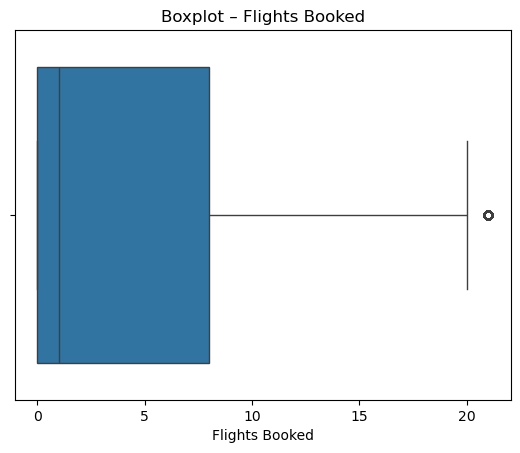

In [72]:
sns.boxplot(x=df_flight['Flights Booked'])
plt.title('Boxplot – Flights Booked')
plt.show()

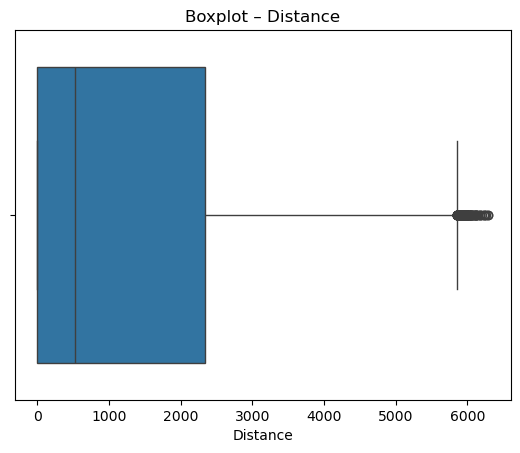

In [73]:
sns.boxplot(x=df_flight['Distance'])
plt.title('Boxplot – Distance')
plt.show()

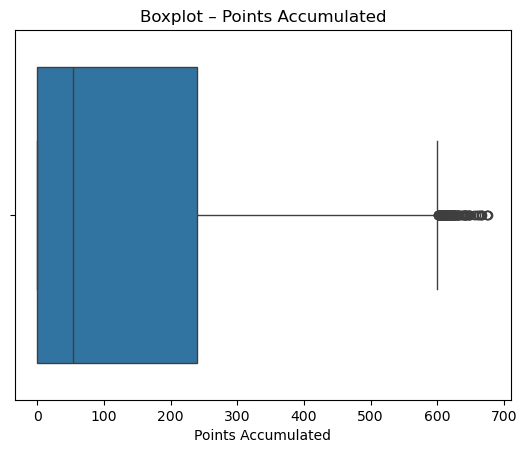

In [74]:
sns.boxplot(x=df_flight['Points Accumulated'])
plt.title('Boxplot – Points Accumulated')
plt.show()

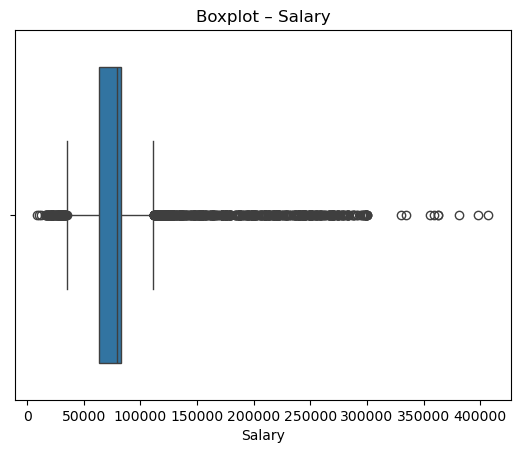

In [75]:
sns.boxplot(x=df_loyalty['Salary'])
plt.title('Boxplot – Salary')
plt.show()

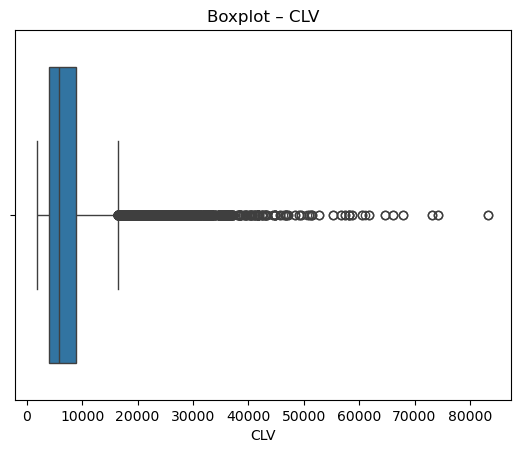

In [76]:
sns.boxplot(x=df_loyalty['CLV'])
plt.title('Boxplot – CLV')
plt.show()

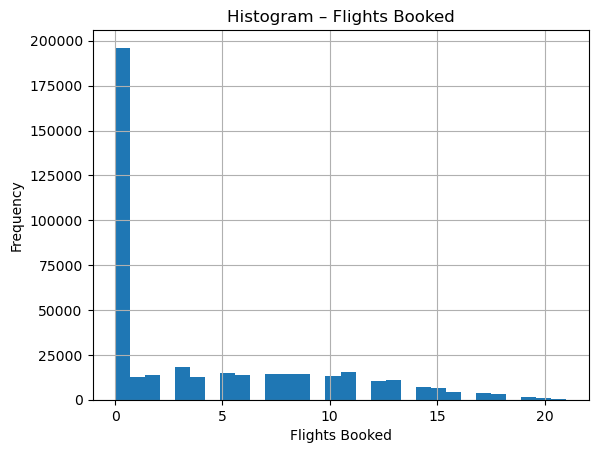

In [77]:
df_flight['Flights Booked'].hist(bins=30)
plt.title('Histogram – Flights Booked')
plt.xlabel('Flights Booked')
plt.ylabel('Frequency')
plt.show()

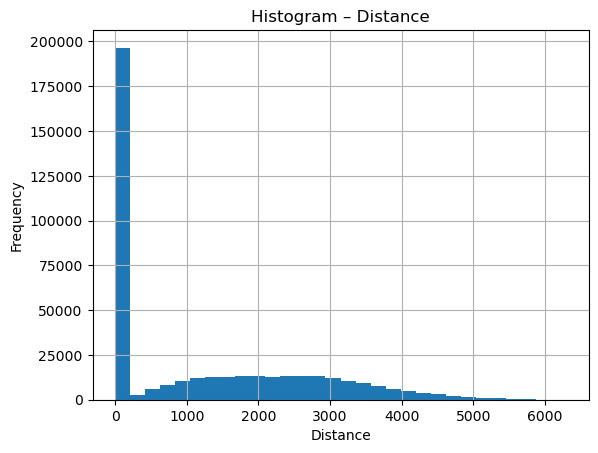

In [78]:
df_flight['Distance'].hist(bins=30)
plt.title('Histogram – Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

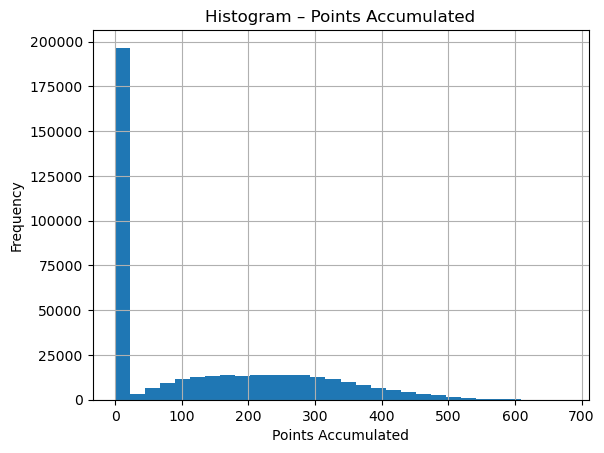

In [79]:
df_flight['Points Accumulated'].hist(bins=30)
plt.title('Histogram – Points Accumulated')
plt.xlabel('Points Accumulated')
plt.ylabel('Frequency')
plt.show()

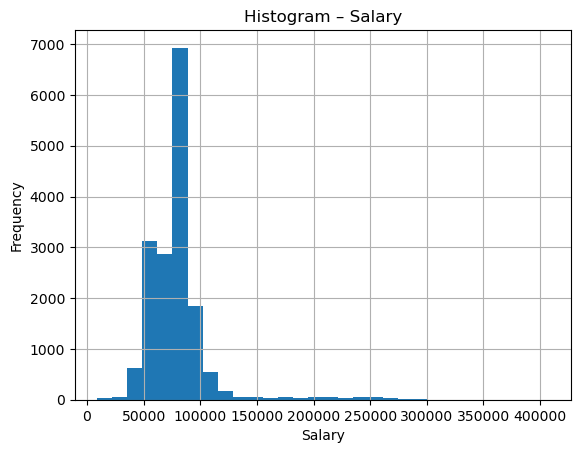

In [80]:
df_loyalty['Salary'].hist(bins=30)
plt.title('Histogram – Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

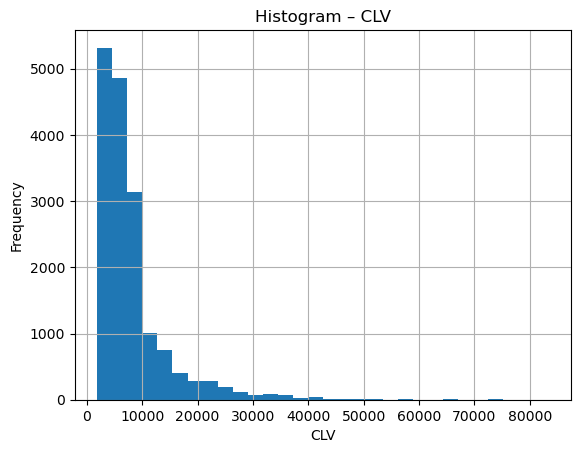

In [81]:
df_loyalty['CLV'].hist(bins=30)
plt.title('Histogram – CLV')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#union de las tablas

In [87]:
df_merge = df_loyalty.merge(df_flight, left_on = 'Loyalty Number', right_on = 'Loyalty Number')
df_merge.head(5)

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [83]:
df_loyalty.shape

(16737, 15)

In [85]:
df_flight.shape

(403760, 10)

In [88]:
df_merge.shape

(403760, 24)

In [90]:
df_merge.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [ ]:
#reviso nuevamente que no haya nulos

In [91]:
nulos = df_merge.isnull().sum()/df_merge.shape[0]*100
nulos

Loyalty Number                  0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                          0.000000
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
dtype: float64

Tras la unión de los datasets, se revisó la presencia de valores nulos. Únicamente se detectan valores faltantes en las variables de cancelación, lo cual es coherente con clientes que continúan activos en el programa de fidelización.

## FASE 2: ANÁLISIS ESTADISTICO

In [94]:
datos = [
    'Flights Booked',
    'Flights with Companions',
    'Total Flights',
    'Distance',
    'Points Accumulated',
    'Points Redeemed',
    'Dollar Cost Points Redeemed',
    'Salary',
    'CLV'
]

# Calcular y mostrar estadísticas para cada columna
for col in datos:
    print(f"Estadísticas de {col}:")
    print(f"  Media: {df_merge[col].mean():.2f}")
    print(f"  Mediana: {df_merge[col].median():.2f}")
    print(f"  Moda: {df_merge[col].mode().iloc[0]}")
    print(f"  Desviación estándar: {df_merge[col].std():.2f}")
    print(f"  Coeficiente de variación: {(df_merge[col].std() / df_merge[col].mean())*100:.2f}%")
    print(f"  Mínimo: {df_merge[col].min()}")
    print(f"  Máximo: {df_merge[col].max()}")
    print(f"  IQR: {df_merge[col].quantile(0.75) - df_merge[col].quantile(0.25)}")
    print()

Estadísticas de Flights Booked:
  Media: 4.13
  Mediana: 1.00
  Moda: 0
  Desviación estándar: 5.23
  Coeficiente de variación: 126.51%
  Mínimo: 0
  Máximo: 21
  IQR: 8.0

Estadísticas de Flights with Companions:
  Media: 1.04
  Mediana: 0.00
  Moda: 0
  Desviación estándar: 2.08
  Coeficiente de variación: 200.71%
  Mínimo: 0
  Máximo: 11
  IQR: 1.0

Estadísticas de Total Flights:
  Media: 5.17
  Mediana: 1.00
  Moda: 0
  Desviación estándar: 6.53
  Coeficiente de variación: 126.23%
  Mínimo: 0
  Máximo: 32
  IQR: 10.0

Estadísticas de Distance:
  Media: 1214.46
  Mediana: 525.00
  Moda: 0
  Desviación estándar: 1434.10
  Coeficiente de variación: 118.09%
  Mínimo: 0
  Máximo: 6293
  IQR: 2342.0

Estadísticas de Points Accumulated:
  Media: 124.26
  Mediana: 53.00
  Moda: 0.0
  Desviación estándar: 146.70
  Coeficiente de variación: 118.05%
  Mínimo: 0.0
  Máximo: 676.5
  IQR: 240.0

Estadísticas de Points Redeemed:
  Media: 30.84
  Mediana: 0.00
  Moda: 0
  Desviación estándar: 125.

### Flights booked: 
La variable Flights Booked presenta una media de 4.13 frente a una mediana de 1, lo que indica que la mayoría de los clientes realiza pocos vuelos, mientras que un grupo reducido concentra una mayor actividad. El coeficiente de variación del 126.5% confirma una elevada dispersión relativa, lo que sugiere la presencia de valores extremos.

### Flights with Companions

En Flights with Companions, la mediana es 0, indicando que al menos la mitad de los clientes no viaja con acompañantes. El coeficiente de variación del 200.7% refleja una gran heterogeneidad, con pocos clientes que concentran la mayoría de los vuelos con acompañantes.

### Total Flights

Total Flights muestra una distribución similar a Flights Booked, con una mediana baja frente a una media elevada y un coeficiente de variación del 126.2%, lo que evidencia una fuerte asimetría positiva y alta dispersión.

### Distance

La distancia recorrida presenta una diferencia notable entre media y mediana, junto con un coeficiente de variación del 118.1%, lo que indica una distribución muy dispersa y la existencia de clientes que realizan trayectos significativamente más largos que la mayoría.

### Points Accumulated

Points Accumulated presenta una elevada variabilidad relativa (CV ≈ 118%), lo que sugiere que la acumulación de puntos depende en gran medida del comportamiento de vuelo de cada cliente.

### Points Redeemed

La mayoría de los clientes no canjea puntos, como refleja una mediana e IQR iguales a 0. Sin embargo, el coeficiente de variación del 407.8% indica que un pequeño grupo realiza canjes elevados, generando una distribución extremadamente dispersa.

### Dollar Cost Points Redeemed

Esta variable presenta un comportamiento análogo a Points Redeemed, con una fuerte concentración en cero y valores extremos puntuales, lo que se refleja en un coeficiente de variación superior al 400%.

### Salary

El salario presenta una distribución relativamente estable, con media y mediana prácticamente iguales y un coeficiente de variación del 37.8%, lo que indica una variabilidad moderada en relación con la media, aunque con algunos valores máximos elevados.

### CLV 
muestra una elevada dispersión relativa (CV ≈ 85.9%), lo que indica que el valor aportado por los clientes a la empresa es muy desigual, con una minoría que concentra valores especialmente altos.

## Valores Atípicos

In [95]:
variables_numericas = [
    'Flights Booked',
    'Flights with Companions',
    'Total Flights',
    'Distance',
    'Points Accumulated',
    'Points Redeemed',
    'Dollar Cost Points Redeemed',
    'Salary',
    'CLV'
]

for col in variables_numericas:
    Q1 = df_merge[col].quantile(0.25)
    Q3 = df_merge[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_merge[
        (df_merge[col] < lower_bound) |
        (df_merge[col] > upper_bound)
    ]
    
    print(f'Variable: {col}')
    print(f'  Número de outliers detectados: {outliers.shape[0]}')
    print()

Variable: Flights Booked
  Número de outliers detectados: 528

Variable: Flights with Companions
  Número de outliers detectados: 71560

Variable: Total Flights
  Número de outliers detectados: 1984

Variable: Distance
  Número de outliers detectados: 125

Variable: Points Accumulated
  Número de outliers detectados: 112

Variable: Points Redeemed
  Número de outliers detectados: 24181

Variable: Dollar Cost Points Redeemed
  Número de outliers detectados: 24181

Variable: Salary
  Número de outliers detectados: 20876

Variable: CLV
  Número de outliers detectados: 35941



La detección de valores atípicos mediante el método IQR muestra una elevada presencia de outliers en varias variables, especialmente en aquellas con distribuciones asimétricas y muchos valores concentrados en cero. Estos valores no se consideran errores, sino comportamientos extremos pero coherentes con la naturaleza del negocio, por lo que se mantienen para el análisis.

## Análisis de correlación entre variables numéricas.

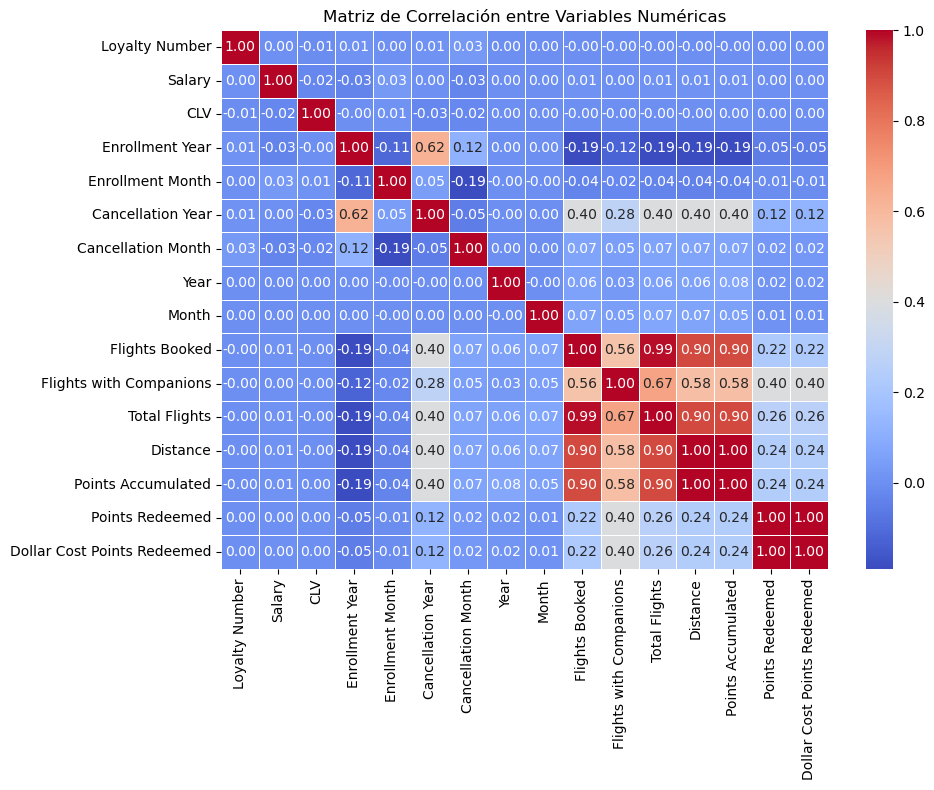

In [97]:
correlation_matrix = df_merge.select_dtypes(include="number").corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

### Interpretación del análisis de correlación

### Relación entre vuelos (Flights Booked y Total Flights)
Existe una correlación muy elevada entre Flights Booked y Total Flights, lo cual es coherente ya que los vuelos reservados en un período contribuyen al total acumulado de vuelos del cliente. No se trata de variables redundantes, sino de medidas a distinto nivel temporal.

### Actividad de vuelo, distancia y puntos
Se observa una fuerte relación positiva entre Flights Booked, Distance y Points Accumulated. Esto indica que los clientes que realizan más vuelos recorren mayores distancias y acumulan más puntos, lo que sugiere que el sistema de puntos está basado en la distancia recorrida.

### Puntos redimidos y coste en dólares
La correlación prácticamente perfecta entre Points Redeemed y Dollar Cost Points Redeemed confirma que ambas variables representan la misma información expresada en diferentes unidades.

### Vuelos con acompañantes
Flights with Companions presenta una correlación moderada con el número total de vuelos y la distancia, lo que sugiere que los clientes más activos tienden a viajar con acompañantes con mayor frecuencia.

### Valor del cliente (CLV)
El CLV presenta una correlación baja con las variables relacionadas con la actividad de vuelo. Esto indica que el valor de vida del cliente no depende únicamente del número de vuelos realizados o de la distancia recorrida, sino que está influido por otros factores adicionales.

### Salario
El salario presenta una correlación muy baja con la actividad de vuelo y la acumulación de puntos, lo que sugiere que el comportamiento de los clientes no está directamente condicionado por su nivel de ingresos.

### Variables temporales
Las variables temporales relacionadas con el año y mes de inscripción presentan correlaciones débiles con la actividad de vuelo, lo que indica que el comportamiento de los clientes no varía de forma significativa en función del momento de inscripción.
Por otro lado, la fecha de cancelación muestra una correlación moderada con algunas variables de actividad, lo que puede estar relacionado con el hecho de que los clientes que cancelan su membresía han acumulado previamente un cierto nivel de actividad en el programa.

## Análisis de variables categóricas:
-. Distribución de frecuencias de las variables categóricas relevantes.

In [98]:
variables_categoricas = [
    'Gender',
    'Education',
    'Marital Status',
    'Loyalty Card',
    'Enrollment Type',
    'Province'
]

for col in variables_categoricas:
    print(f'\nDistribución de frecuencias para {col}')
    
    frecuencia_abs = df_merge[col].value_counts()
    frecuencia_rel = df_merge[col].value_counts(normalize=True) * 100
    
    tabla = pd.DataFrame({
        'Frecuencia Absoluta': frecuencia_abs,
        'Frecuencia Relativa (%)': frecuencia_rel
    })
    
    display(tabla)


Distribución de frecuencias para Gender


,Frecuencia Absoluta,Frecuencia Relativa (%)
Gender,,
Female,202757,50.217208
Male,201003,49.782792



Distribución de frecuencias para Education


,Frecuencia Absoluta,Frecuencia Relativa (%)
Education,,
Bachelor,252567,62.553745
College,102260,25.326927
High School or Below,18915,4.684714
Doctor,17731,4.391470
Master,12287,3.043144



Distribución de frecuencias para Marital Status


,Frecuencia Absoluta,Frecuencia Relativa (%)
Marital Status,,
Married,234845,58.164504
Single,108153,26.786457
Divorced,60762,15.049039



Distribución de frecuencias para Loyalty Card


,Frecuencia Absoluta,Frecuencia Relativa (%)
Loyalty Card,,
Star,183745,45.508470
Nova,136883,33.902071
Aurora,83132,20.589459



Distribución de frecuencias para Enrollment Type


,Frecuencia Absoluta,Frecuencia Relativa (%)
Enrollment Type,,
Standard,380419,94.219091
2018 Promotion,23341,5.780909



Distribución de frecuencias para Province


,Frecuencia Absoluta,Frecuencia Relativa (%)
Province,,
Ontario,130258,32.261244
British Columbia,106442,26.362691
Quebec,79573,19.707995
Alberta,23360,5.785615
Manitoba,15900,3.937983
New Brunswick,15352,3.802259
Nova Scotia,12507,3.097632
Saskatchewan,9861,2.442292
Newfoundland,6244,1.546463


Género
La distribución por género es prácticamente equilibrada, con una proporción muy similar de clientes femeninos y masculinos, lo que indica ausencia de sesgos relevantes en la composición de la muestra.

Nivel educativo
Predomina claramente el nivel Bachelor, seguido de College. Los niveles de Doctor y Master representan una proporción minoritaria, lo que sugiere que la mayoría de los clientes posee estudios universitarios de grado o formación equivalente.

Estado civil
La mayoría de los clientes están casados, seguidos por solteros y, en menor medida, divorciados. Esto indica una mayor representación de clientes con estructuras familiares estables dentro del programa de fidelización.

Tipo de tarjeta de fidelización
La tarjeta Star es la más frecuente, seguida de Nova y Aurora. Esto sugiere que la mayor parte de los clientes se concentra en los niveles intermedios del programa de fidelización.

Tipo de inscripción
La gran mayoría de los clientes se inscribieron mediante el tipo Standard, mientras que la promoción de 2018 representa un porcentaje reducido, lo que indica un impacto limitado de dicha campaña en el total de la base de clientes.

Provincia
La mayor concentración de clientes se encuentra en Ontario, British Columbia y Quebec, lo cual es coherente con la mayor densidad poblacional de estas provincias. El resto de provincias presenta una representación menor.

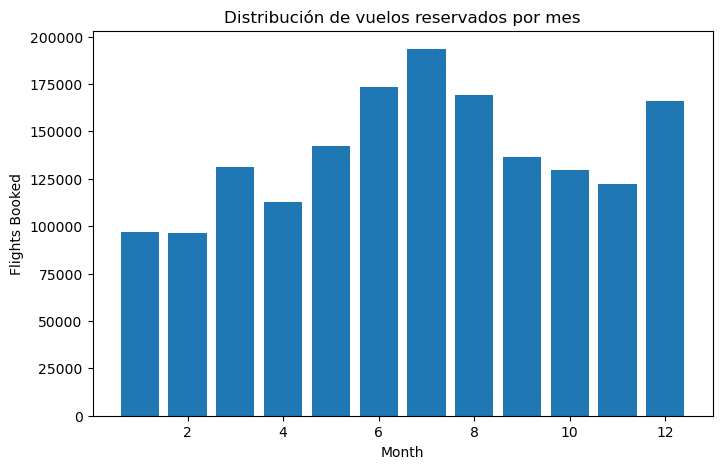

In [106]:
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

vuelos_por_mes = df_merge.groupby('Month')['Flights Booked'].sum()

plt.figure(figsize=(8, 5))
plt.bar(vuelos_por_mes.index, vuelos_por_mes.values)
plt.xlabel('Month')
plt.ylabel('Flights Booked')
plt.title('Distribución de vuelos reservados por mes')
plt.show()

La distribución de vuelos por mes muestra un patrón estacional, con un aumento de la actividad durante los meses de verano y un repunte en diciembre. 

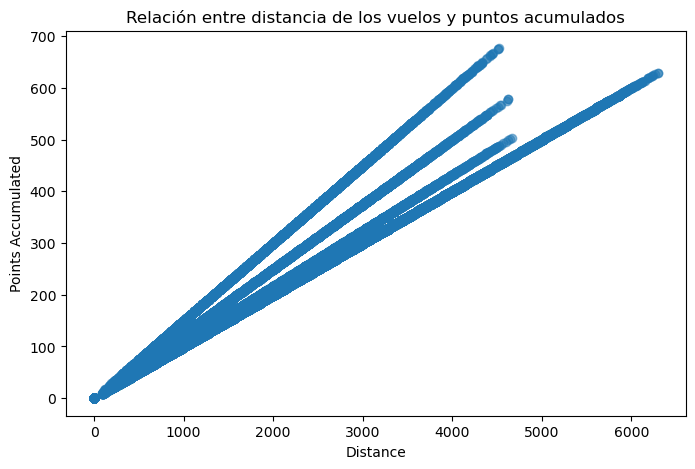

In [107]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df_merge['Distance'],
    df_merge['Points Accumulated'],
    alpha=0.5
)

plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.title('Relación entre distancia de los vuelos y puntos acumulados')
plt.show()

El diagrama de dispersión muestra una relación positiva muy fuerte y prácticamente lineal entre la distancia recorrida y los puntos acumulados. La presencia de varias líneas paralelas sugiere que los puntos se asignan en función de la distancia, posiblemente aplicando distintos factores o reglas según el tipo de vuelo o el perfil del cliente.

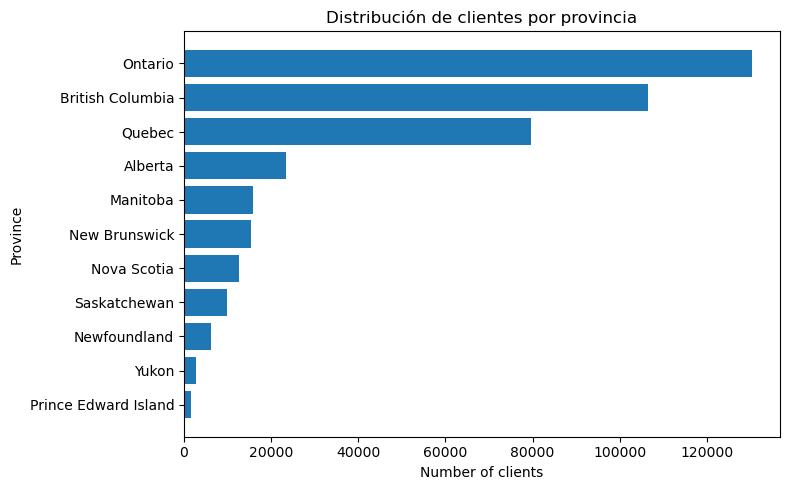

In [118]:
clientes_por_provincia = df_merge['Province'].value_counts()

plt.figure(figsize=(8, 5))
plt.barh(
    clientes_por_provincia.index,
    clientes_por_provincia.values
)

plt.xlabel('Number of clients')
plt.ylabel('Province')
plt.title('Distribución de clientes por provincia')
plt.gca().invert_yaxis()  # la más grande arriba
plt.tight_layout()
plt.show()

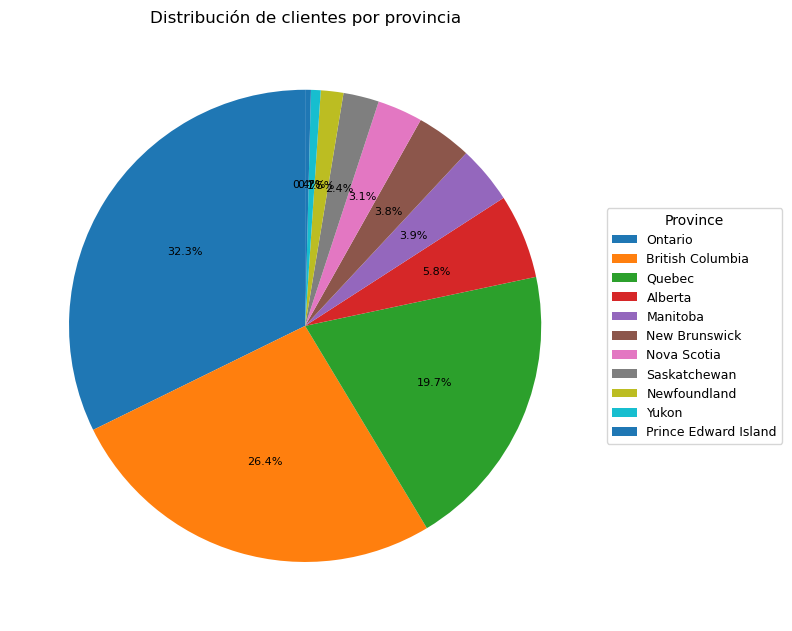

In [119]:
plt.figure(figsize=(8, 8))
plt.pie(
    clientes_por_provincia.values,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 8}
)

plt.legend(
    clientes_por_provincia.index,
    title='Province',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

plt.title('Distribución de clientes por provincia')
plt.tight_layout()
plt.show()

La distribución de clientes por provincia muestra una clara concentración en Ontario, British Columbia y Quebec, que agrupan la mayor parte de la base de clientes. El resto de provincias presenta una representación significativamente menor. El gráfico de barras permite comparar con mayor claridad el número de clientes entre provincias, mientras que el gráfico de sectores facilita la visualización de su peso relativo dentro del total.

¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

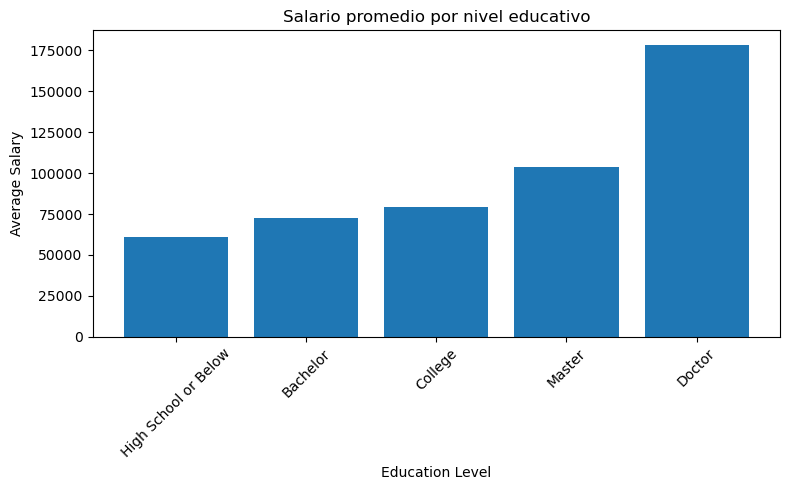

In [120]:
salario_por_educacion = df_merge.groupby('Education')['Salary'].mean().sort_values()

plt.figure(figsize=(8, 5))
plt.bar(
    salario_por_educacion.index,
    salario_por_educacion.values
)

plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Salario promedio por nivel educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra una relación clara y positiva entre el nivel educativo y el salario promedio de los clientes. A medida que aumenta el nivel de estudios, el salario medio tiende a incrementarse, siendo los clientes con estudios de doctorado los que presentan el salario promedio más alto, mientras que aquellos con educación secundaria o inferior muestran los salarios más bajos.

In [ ]:
Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad

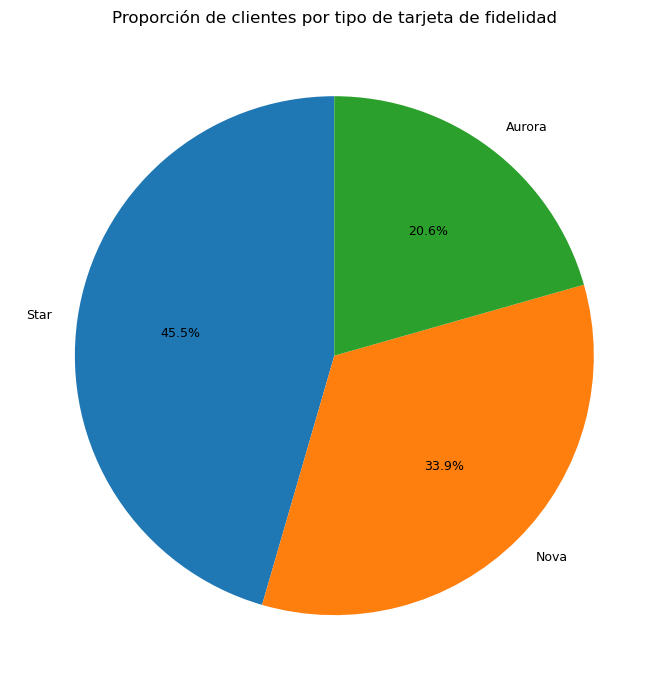

In [121]:
clientes_por_tarjeta = df_merge['Loyalty Card'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    clientes_por_tarjeta.values,
    labels=clientes_por_tarjeta.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)

plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.tight_layout()
plt.show()

In [ ]:
Cómo se distribuyen los clientes según su estado civil y género

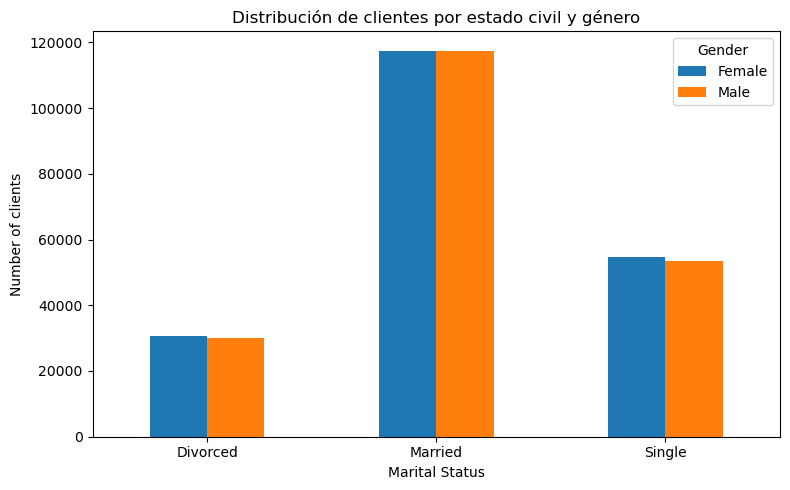

In [122]:
distribucion = (
    df_merge
    .groupby(['Marital Status', 'Gender'])
    .size()
    .unstack()
)

distribucion.plot(
    kind='bar',
    figsize=(8, 5)
)

plt.xlabel('Marital Status')
plt.ylabel('Number of clients')
plt.title('Distribución de clientes por estado civil y género')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

La distribución muestra que, dentro de cada estado civil, la proporción de hombres y mujeres es similar, sin diferencias significativas entre géneros.

## FASE 4: Evaluación de Diferencias en reservas de Vuelos por Nivel Educativo

In [124]:
df_fase4 = df_merge[['Flights Booked', 'Education']]

estadisticas_por_educacion = (df_fase4.groupby('Education')['Flights Booked'].agg(['count', 'mean', 'std']))

estadisticas_por_educacion.round(2)

,count,mean,std
Education,,,
Bachelor,252567,4.11,5.22
College,102260,4.17,5.25
Doctor,17731,4.18,5.26
High School or Below,18915,4.18,5.24
Master,12287,4.20,5.21


El promedio de vuelos reservados es muy similar entre todos los niveles educativos, situándose en torno a 4.1–4.2 vuelos.

Las desviaciones estándar también son prácticamente iguales en todos los grupos (≈ 5.2), lo que indica una variabilidad comparable en el comportamiento de reservas.

No se aprecian diferencias descriptivas claras entre niveles educativos en cuanto al número de vuelos reservados.

El tamaño muestral (count) es muy distinto entre grupos, siendo Bachelor y College los más representativos, mientras que Master y Doctor cuentan con menos observaciones.